### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Матюшкин Денис Владимирович
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант 4

Automobile Data Set  

Название файла: imports-85.data

Ссылка: https://archive.ics.uci.edu/ml/datasets/Automobile  

Класс: symboling (столбец No 1)

Метод отбора признаков – одномерный отбор признаков (SelectKBest)

Модели классификации:

- наивный байесовский классификатор

- классификатор метода опорных векторов    

- классификатор метода опорных векторов с полиномиальными зависимостями (degree=2)

Кривая для визуализации - ROC-кривая

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
                "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
                "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
                "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
                "city-mpg", "highway-mpg", "price"]

my_data = pd.read_csv(url, names=column_names)
my_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс.

In [3]:
count_null = my_data['symboling'].isnull().sum()
if (count_null > 0):
  my_data = my_data.dropna(subset=['symboling'])
else:
  print("Количество пропущенных значений в столбце symboling:", count_null)

Количество пропущенных значений в столбце symboling: 0


In [4]:
print("Уникальные значения в столбце symboling и их количество:")
print(my_data['symboling'].value_counts())

Уникальные значения в столбце symboling и их количество:
symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64


Класс 0 не сильно преобладает над другими, поэтому объединим классы с примерно равным количеством точек.

In [5]:
my_data['symboling'] = my_data['symboling'].apply(lambda x: 0 if x in [-2, 0, 2] else 1)
my_data['symboling'].value_counts()

,count
symboling,
1,103
0,102


In [6]:
my_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


3. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.  

In [7]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
my_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
numeric_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
                   'curb-weight', 'engine-size', 'bore', 'stroke',
                   'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
                   'highway-mpg', 'price']

categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors',
                       'body-style', 'drive-wheels', 'engine-location',
                       'engine-type', 'num-of-cylinders', 'fuel-system']

In [10]:
my_data[numeric_columns] = my_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
my_data = my_data.drop(columns=categorical_columns)

my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    float64
 12  peak-rpm           203 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    float64
dtypes: float64(11), int64(5)
m

In [11]:
for column in numeric_columns:
  if my_data[column].isnull().sum() > 0:
      mean_class_0 = my_data[my_data['symboling'] == 0][column].mean()
      mean_class_1 = my_data[my_data['symboling'] == 1][column].mean()

      my_data.loc[my_data['symboling'] == 0, column] = my_data.loc[my_data['symboling'] == 0, column].fillna(mean_class_0)
      my_data.loc[my_data['symboling'] == 1, column] = my_data.loc[my_data['symboling'] == 1, column].fillna(mean_class_1)

my_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,126.452381,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,126.452381,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,126.452381,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,0,164.000000,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,0,164.000000,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


4. Выполните стандартизацию признаков набора данных.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
my_data[numeric_columns] = scaler.fit_transform(my_data[numeric_columns])

my_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,0.143400,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.522367,-1.840763,-0.288349,0.172215,-0.261413,-0.646553,-0.546059,0.036675
1,1,0.143400,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.522367,-1.840763,-0.288349,0.172215,-0.261413,-0.646553,-0.546059,0.419498
2,1,0.143400,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.400719,0.684426,-0.288349,1.262883,-0.261413,-0.953012,-0.691627,0.419498
3,0,1.329004,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.513663,0.460675,-0.035973,-0.056064,0.789200,-0.186865,-0.109354,0.094640
4,0,1.329004,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.513663,0.460675,-0.540725,0.273673,0.789200,-1.106241,-1.273900,0.540524


5. Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

In [15]:
X = my_data[numeric_columns]
y = my_data['symboling']

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

valid_features = [feature for feature in selected_features if X[feature].nunique() > 10]
X_filtered = X[valid_features]

print("Выбранные признаки с более чем 10 различными значениями:")
print(X_filtered.head())

Выбранные признаки с более чем 10 различными значениями:
     height  peak-rpm
0 -2.020417 -0.261413
1 -2.020417 -0.261413
2 -0.543527 -0.261413
3  0.235942  0.789200
4  0.235942  0.789200


6. Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

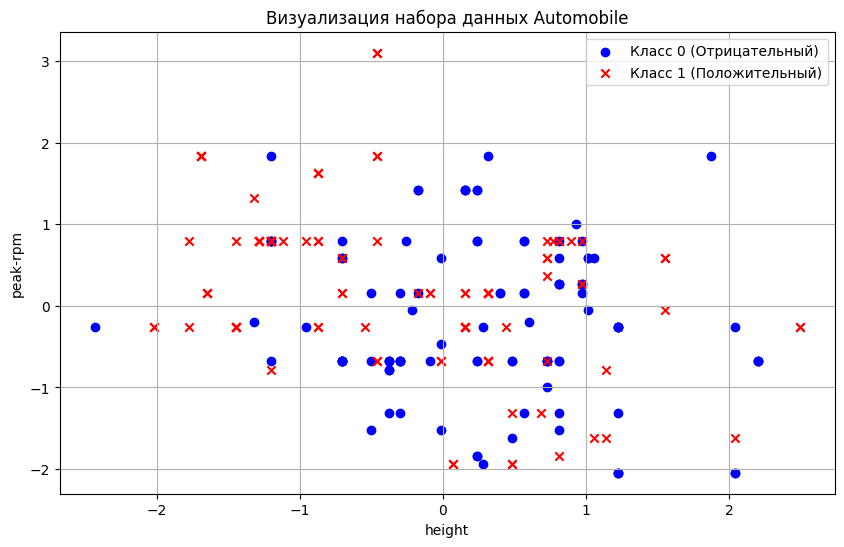

In [16]:
plt.figure(figsize=(10, 6))
plt.title("Визуализация набора данных Automobile")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])

plt.scatter(my_data[selected_features[0]][my_data['symboling'] == 0],
            my_data[selected_features[1]][my_data['symboling'] == 0],
            color='blue', marker='o', label='Класс 0 (Отрицательный)')

plt.scatter(my_data[selected_features[0]][my_data['symboling'] == 1],
            my_data[selected_features[1]][my_data['symboling'] == 1],
            color='red', marker='x', label='Класс 1 (Положительный)')

plt.legend()
plt.grid()
plt.show()

7. Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_new, my_data['symboling'], test_size=0.3, random_state=42)

Модель 1: Наивный байесовский классификатор

In [19]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

Модель 2: Классификатор метода опорных векторов

In [20]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

Модель 3: Классификатор метода опорных векторов с полиномиальными зависимостями (degree=2)

In [21]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

svm_poly_classifier = SVC(kernel='poly', degree=2)
svm_poly_classifier.fit(X_train_poly, y_train)
y_pred_svm_poly = svm_poly_classifier.predict(X_test_poly)

In [22]:
print("Наивный байесовский классификатор:")
print(classification_report(y_test, y_pred_nb))

print("\nКлассификатор метода опорных векторов:")
print(classification_report(y_test, y_pred_svm))

print("\nКлассификатор метода опорных векторов с полиномиальными зависимостями (degree=2):")
print(classification_report(y_test, y_pred_svm_poly))

Наивный байесовский классификатор:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        34
           1       0.58      0.64      0.61        28

    accuracy                           0.63        62
   macro avg       0.63      0.63      0.63        62
weighted avg       0.63      0.63      0.63        62


Классификатор метода опорных векторов:
              precision    recall  f1-score   support

           0       0.67      0.59      0.62        34
           1       0.56      0.64      0.60        28

    accuracy                           0.61        62
   macro avg       0.61      0.62      0.61        62
weighted avg       0.62      0.61      0.61        62


Классификатор метода опорных векторов с полиномиальными зависимостями (degree=2):
              precision    recall  f1-score   support

           0       0.65      0.94      0.77        34
           1       0.85      0.39      0.54        28

    accuracy            

8. Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.  

In [23]:
from matplotlib.colors import ListedColormap

In [24]:
def plot_decision_boundary(X, y, classifier, title, selected_features, poly=False, degree=2):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['darkorange', 'c', 'darkgreen']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    if poly:
        poly_features = PolynomialFeatures(degree=degree)
        grid = poly_features.fit_transform(np.c_[xx.ravel(), yy.ravel()])
    else:
        grid = np.c_[xx.ravel(), yy.ravel()]

    Z = classifier.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='blue', marker='o', label='Класс 0 (Отрицательный)')
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='red', marker='x', label='Класс 1 (Положительный)')
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.title(title)

    plt.legend()
    plt.grid()
    plt.show()

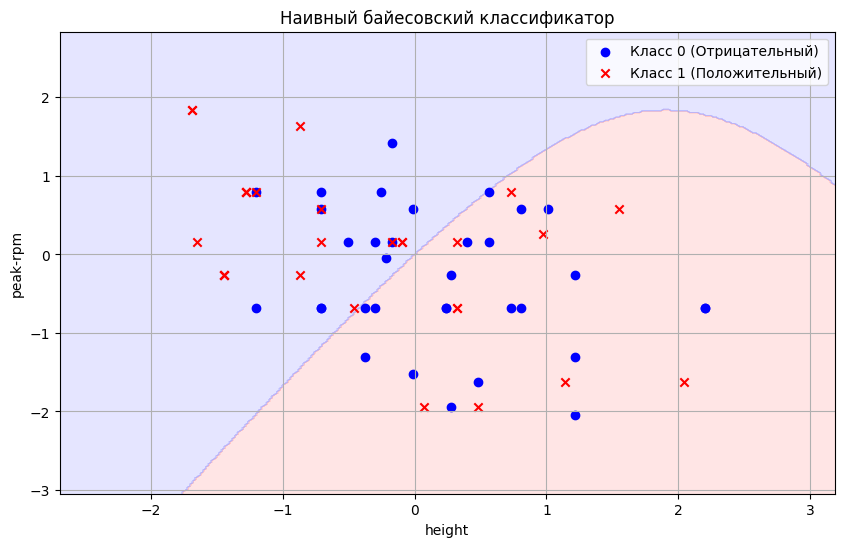

In [25]:
plot_decision_boundary(X_test, y_test, nb_classifier, 'Наивный байесовский классификатор', selected_features)

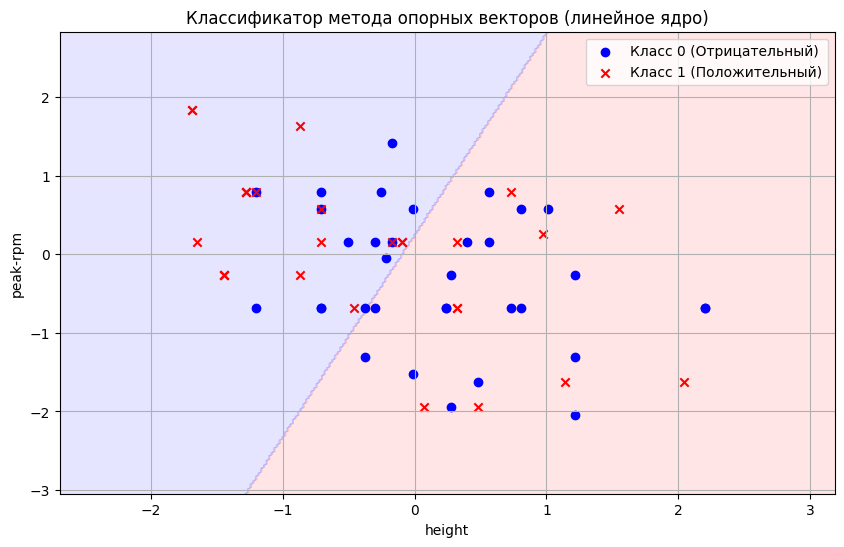

In [26]:
plot_decision_boundary(X_test, y_test, svm_classifier, 'Классификатор метода опорных векторов (линейное ядро)', selected_features)

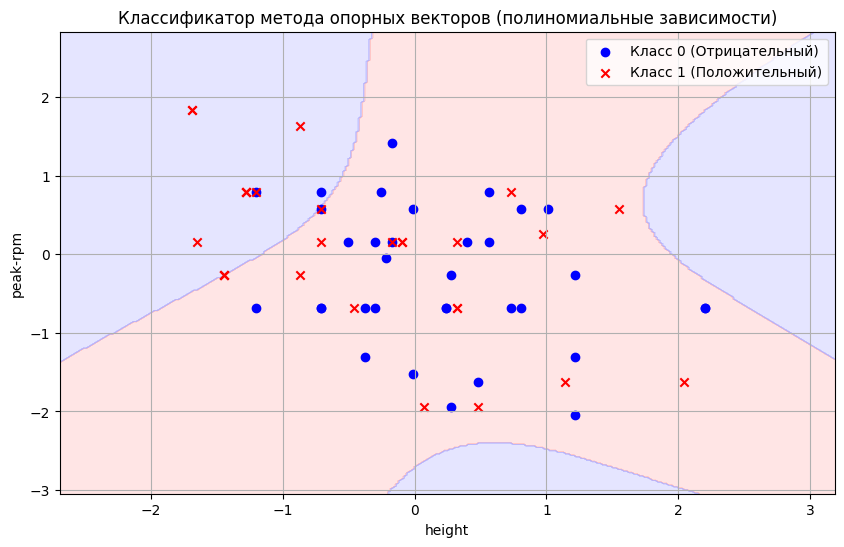

In [27]:
plot_decision_boundary(X_test_poly[:, 1:], y_test, svm_poly_classifier,
                       'Классификатор метода опорных векторов (полиномиальные зависимости)',
                       selected_features, poly=True)

9. Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.

In [28]:
from sklearn.metrics import roc_curve, auc

In [29]:
def plot_roc_curves(classifiers, X_test, y_test, X_test_poly, classifier_names):
    plt.figure(figsize=(10, 6))
    auc_scores = {}

    for classifier, name in zip(classifiers, classifier_names):
        if classifier == svm_poly_classifier:
            X_test_current = X_test_poly
        else:
            X_test_current = X_test

        if hasattr(classifier, "predict_proba"):
            y_scores = classifier.predict_proba(X_test_current)[:, 1]
        else:
            y_scores = classifier.decision_function(X_test_current)

        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        auc_scores[name] = roc_auc
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC-кривые для классификаторов')

    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return auc_scores

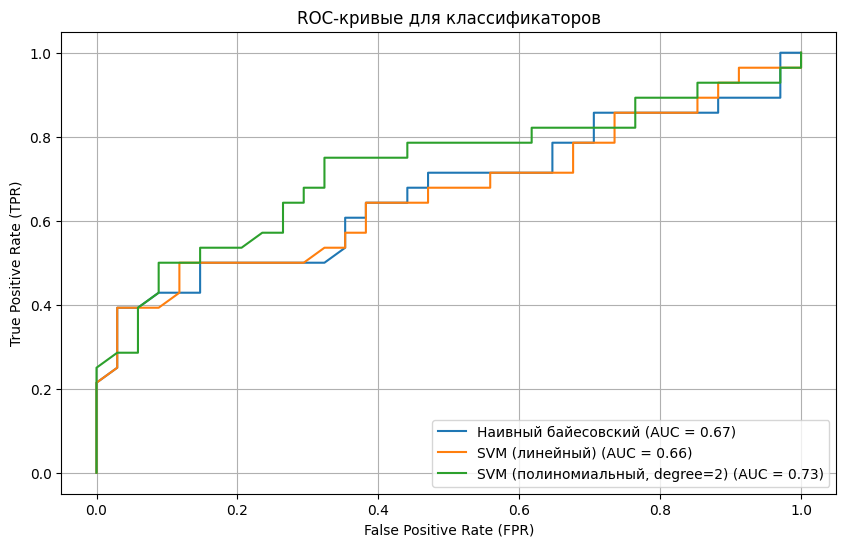

In [31]:
classifiers = [nb_classifier, svm_classifier, svm_poly_classifier]
classifier_names = ['Наивный байесовский', 'SVM (линейный)', 'SVM (полиномиальный, degree=2)']

auc_scores = plot_roc_curves(classifiers, X_test, y_test, X_test_poly, classifier_names)

10. Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.

In [32]:
best_classifier = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_classifier]

print(f'Лучший классификатор: {best_classifier} с AUC = {best_auc:.2f}')

Лучший классификатор: SVM (полиномиальный, degree=2) с AUC = 0.73
